In [ ]:
!pip install gurobipy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
rnd=np.random
rnd.seed(0)
rnd

<module 'numpy.random' from '/usr/local/lib/python3.10/dist-packages/numpy/random/__init__.py'>

In [ ]:
n=10
xc=rnd.rand(n+1)*200
yc=rnd.rand(n+1)*100
xc


array([109.76270079, 143.03787327, 120.55267521, 108.9766366 ,
        84.73095987, 129.17882261,  87.51744225, 178.35460016,
       192.7325521 ,  76.68830377, 158.34500762])

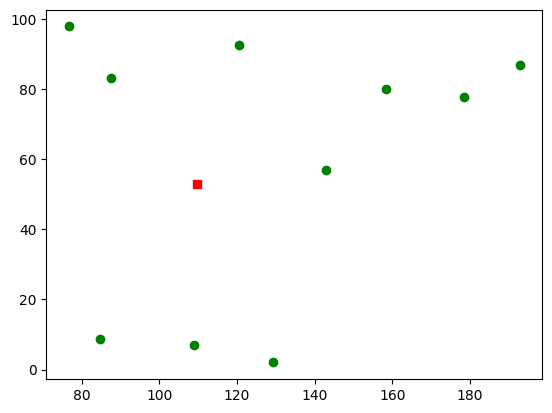

In [ ]:
plt.plot(xc[0],yc[0],c='r',marker='s')
plt.scatter(xc[1:],yc[1:],c='g')

In [ ]:
N=[i for i in range(1,n+1)]
V=[0]+N
V

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
A=[(i,j) for i in V for j in V if i!=j]
A

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (7, 10),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 9),
 (8, 10),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 10),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),


In [ ]:
c={(i,j): np.hypot(xc[j]-xc[i],yc[j]-yc[i]) for i,j in A}
c

{(0, 1): 33.50468696086079,
 (0, 2): 41.11138629503385,
 (0, 3): 45.79263333713419,
 (0, 4): 50.77555203012287,
 (0, 5): 54.44725732628541,
 (0, 6): 37.647574061136034,
 (0, 7): 72.98056771655875,
 (0, 8): 89.70844922828567,
 (0, 9): 55.82497026893104,
 (0, 10): 55.59374885917202,
 (1, 0): 33.50468696086079,
 (1, 2): 42.23764921128613,
 (1, 3): 60.2523224726414,
 (1, 4): 75.58102299795816,
 (1, 5): 56.50848025794605,
 (1, 6): 61.502187540784085,
 (1, 7): 41.09431251296798,
 (1, 8): 58.14985245467972,
 (1, 9): 78.02546809638228,
 (1, 10): 27.720843893358516,
 (2, 0): 41.11138629503385,
 (2, 1): 42.23764921128613,
 (2, 3): 86.23654979493304,
 (2, 4): 91.17823243082672,
 (2, 5): 90.94783124977752,
 (2, 6): 34.318704181986625,
 (2, 7): 59.652726097030026,
 (2, 8): 72.39358384965435,
 (2, 9): 44.18366319713841,
 (2, 10): 39.85130178750766,
 (3, 0): 45.79263333713419,
 (3, 1): 60.2523224726414,
 (3, 2): 86.23654979493304,
 (3, 4): 24.29902805451533,
 (3, 5): 20.831530577252774,
 (3, 6): 79.1

In [ ]:
Q=20
q={i:rnd.randint(1,10) for i in N}
q

{1: 4, 2: 4, 3: 4, 4: 8, 5: 1, 6: 2, 7: 1, 8: 5, 9: 8, 10: 4}

In [ ]:
from gurobipy import GRB, quicksum, Model

In [ ]:
mdl=Model('CVRP')

Restricted license - for non-production use only - expires 2024-10-28


In [ ]:
x=mdl.addVars(A, vtype=GRB.BINARY)
u=mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [ ]:
mdl.modelSense=GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*c[i,j] for i,j in A))

In [ ]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!=i)==1 for i in N)
mdl.addConstrs(quicksum(x[i,j] for i in V if i!=j)==1 for j in N)
mdl.addConstrs((x[i,j]==1) >> (u[i]+q[j]==u[j]) for i,j in A if j!=0 and i!=0)
mdl.addConstrs(u[i]<=Q for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>}

In [ ]:
mdl.Params.TimeLimit=30
mdl.optimize()

Set parameter TimeLimit to value 30
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 30 rows, 120 columns and 210 nonzeros
Model fingerprint: 0xb67a3280
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 189 rows and 12 columns
Presolve time: 0.02s
Presolved: 219 rows, 132 columns, 1324 nonzeros
Variable types: 42 continuous, 90 integer (90 binary)
Found heuristic solution: objective 1074.7736522

Root relaxation: objective 3.013706e+02, 43 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      

In [ ]:
active_arcs= [a for a in A if x[a].x>=.99]
active_arcs

[(0, 5),
 (0, 9),
 (1, 0),
 (2, 10),
 (3, 4),
 (4, 0),
 (5, 3),
 (6, 2),
 (7, 1),
 (8, 7),
 (9, 6),
 (10, 8)]

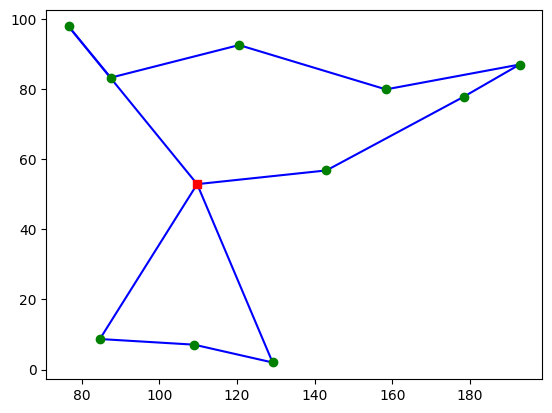

In [ ]:
for i,j in active_arcs:
  plt.plot([xc[i],xc[j]],[yc[i],yc[j]],c='b',zorder=0)
plt.plot(xc[0],yc[0],c='r',marker='s')
plt.scatter(xc[1:],yc[1:],c='g')